# VaryRun and scipy's SLSQP

Using VaryRun, scipy's SLSQP was used to solve for previously non-converging scenarios on CSD3.

In [1]:
# Reload Process each time (keep editable install up-to-date)
%load_ext autoreload
%autoreload 2

from pathlib import Path
from shutil import copy
from process.io import plot_solutions as ps

# Copy raw varyrun data into plot_solutions.py plottable format
varyrun_result_dirs = Path("varyrun_results").glob("*")
data_dir = Path("data")

for varyrun_result_dir in varyrun_result_dirs:
    mfile_path_src = varyrun_result_dir / "MFILE.DAT"
    scenario = varyrun_result_dir.name
    mfile_path_dest = data_dir / (scenario + "_scipy_MFILE.DAT")
    copy(mfile_path_src, mfile_path_dest)


Copied previous VMCON MFILE results from "scipy" dir. Also copied previously unconverged VaryRun solutions to data dir. Now combine with previously converging (i.e. non-VaryRun requiring) solutions.

process.io.plot_solutions - WARNING - scipy running L_mode threw exception: no mfile data. Not plotting
process.io.plot_solutions - WARNING - scipy running G-L_Nb-Ti threw exception: no mfile data. Not plotting
process.io.plot_solutions - WARNING - CFETR_small contains different number of nans for each solver. Not plotting
process.io.plot_solutions - WARNING - Discarding hts_REBCO, as solver not converged
process.io.plot_solutions - WARNING - Discarding stellarator, as solver not converged
process.io.plot_solutions - WARNING - Discarding 2D_scan, as solver not converged


Text(0.5, 1.0, "RMS errors between VMCON and VaryRuns of scipy's SLSQP, all\nconverged to 1e-7")

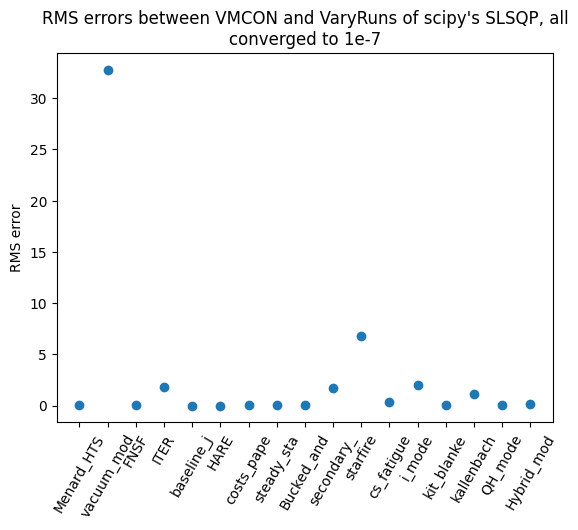

In [6]:
results_df, ax = ps.compare_solvers_regression_tests(["legacy_vmcon", "scipy"], rerun_tests=False)
ax.set_title("RMS errors between VMCON and VaryRuns of scipy's SLSQP, all\nconverged to 1e-7")

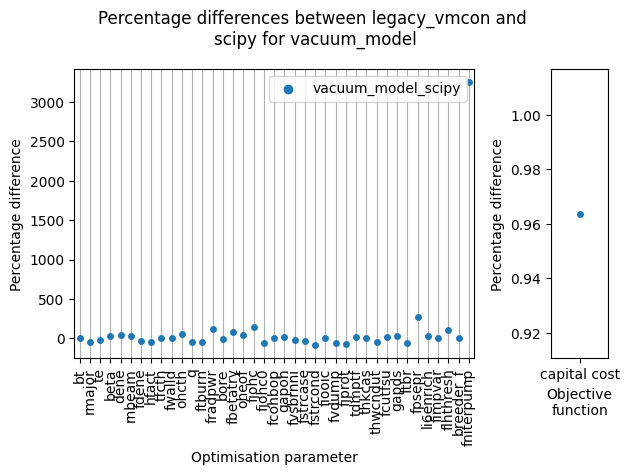

In [2]:
results_df = ps.compare_solvers_regression_test("vacuum_model", ["legacy_vmcon", "scipy"], rerun_tests=False)